In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# open embeddings
data = pd.read_pickle('./working_data/extracted_embeddings.pk')

# Data filtering. Remove discards
data_filtered = []
for row, v in data.iterrows():
    # MAPPING {'disgust':0,'happy':1,'sad':2,'neutral':3,'fear':4,'angry':5}
    if v.labels != 'discard' and (v.labels == 1 or v.labels == 2 or v.labels==5 or v.labels==3):
        data_filtered.append(v)
print(len(data_filtered)/len(data), '% valid data ---', len(data_filtered), 'samples')

embeddings = []
subjects = []
labels = []
for em in data_filtered:
    embeddings.append(em['dt'])
    subjects.append(em['subject'])
    labels.append(em['labels'])
    

0.6068261220102124 % valid data --- 4516 samples


In [3]:
from sklearn.manifold import TSNE
from matplotlib import cm

In [4]:
averaged_embeddings = []
for i in embeddings:
    averaged_embeddings.append( np.mean(i, axis=0))


In [5]:
cdict = {1: 'red', 2: 'blue', 3: 'green', 5: 'yellow'}

In [8]:
from collections import Counter
Counter(labels)

Counter({2: 1222, 5: 1112, 1: 1105, 3: 1077})

/research/iprobe-sandle20/miniconda3/envs/dt_emorecog/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/research/iprobe-sandle20/miniconda3/envs/dt_emorecog/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4516 samples in 0.001s...
[t-SNE] Computed neighbors for 4516 samples in 0.474s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4516
[t-SNE] Computed conditional probabilities for sample 2000 / 4516
[t-SNE] Computed conditional probabilities for sample 3000 / 4516
[t-SNE] Computed conditional probabilities for sample 4000 / 4516
[t-SNE] Computed conditional probabilities for sample 4516 / 4516
[t-SNE] Mean sigma: 0.152195
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.213722
[t-SNE] KL divergence after 1000 iterations: 2.161300
(2,)


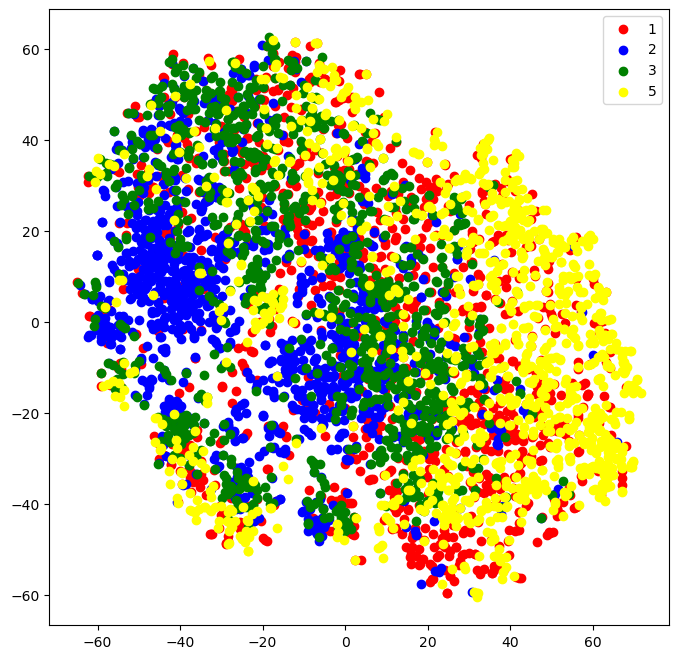

In [64]:
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(averaged_embeddings)

fig, ax = plt.subplots(figsize=(8,8))

for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(tsne_proj[ix, 0], tsne_proj[ix, 1], c = cdict[g], label = g)
ax.legend()
plt.show()

# happy, sad, neutral, angry

In [10]:
train_data = pd.read_pickle('./working_data/msp_train_extracted_embeddings.pk')

#print(data.groupby('labels').count())

# Data filtering. Remove discards
train_data_filtered = []
#print(train_data.groupby('labels').count())
#print(test_data.groupby('labels').count())
for row, v in train_data.iterrows():
    # MAPPING {'disgust':0,'happy':1,'sad':2,'neutral':3,'fear':4,'angry':5}
    if v.labels != 'discard' and (v.labels == 1 or v.labels == 2 or v.labels==5 or v.labels==3):
        train_data_filtered.append(v)
print(len(train_data_filtered)/len(train_data), '% train valid data ---', len(train_data_filtered), 'samples')


train_embeddings = []
train_subjects = []
train_labels = []
for em in train_data_filtered:
    train_embeddings.append(em['dt'])
    train_subjects.append(em['subject'])
    train_labels.append(em['labels'])


0.6341273201274539 % train valid data --- 28459 samples


In [11]:
averaged_embeddings = []
for i in train_embeddings:
    averaged_embeddings.append( np.mean(i, axis=0))


/research/iprobe-sandle20/miniconda3/envs/dt_emorecog/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/research/iprobe-sandle20/miniconda3/envs/dt_emorecog/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28459 samples in 0.010s...
[t-SNE] Computed neighbors for 28459 samples in 19.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28459
[t-SNE] Computed conditional probabilities for sample 2000 / 28459
[t-SNE] Computed conditional probabilities for sample 3000 / 28459
[t-SNE] Computed conditional probabilities for sample 4000 / 28459
[t-SNE] Computed conditional probabilities for sample 5000 / 28459
[t-SNE] Computed conditional probabilities for sample 6000 / 28459
[t-SNE] Computed conditional probabilities for sample 7000 / 28459
[t-SNE] Computed conditional probabilities for sample 8000 / 28459
[t-SNE] Computed conditional probabilities for sample 9000 / 28459
[t-SNE] Computed conditional probabilities for sample 10000 / 28459
[t-SNE] Computed conditional probabilities for sample 11000 / 28459
[t-SNE] Computed conditional probabilities for sample 12000 / 28459
[t-SNE] Computed conditional probabilities for sa

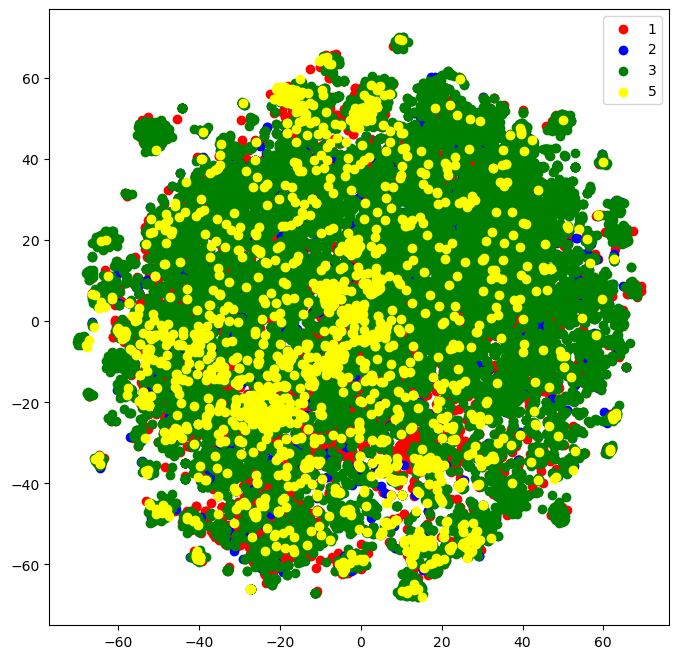

In [14]:
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(averaged_embeddings)

fig, ax = plt.subplots(figsize=(8,8))

for g in np.unique(train_labels):
    ix = np.where(train_labels == g)
    ax.scatter(tsne_proj[ix, 0], tsne_proj[ix, 1], c = cdict[g], label = g)
ax.legend()
plt.show()

# happy, sad, neutral, angry

In [13]:
from collections import Counter
Counter(train_labels)

Counter({3: 16428, 2: 1666, 1: 8530, 5: 1835})